In [ ]:
 pip install spectral

     |████████████████████████████████| 215kB 2.8MB/s 


In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score

In [ ]:
from scipy.io import loadmat

In [ ]:
def read_HSI():
  x=loadmat('PaviaU.mat')['paviaU']
  y=loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"Dataset_shape:{x.shape}\nGround_truth.shape:{y.shape}")
  return x,y
x,y= read_HSI()

Dataset_shape:(610, 340, 103)
Ground_truth.shape:(610, 340)


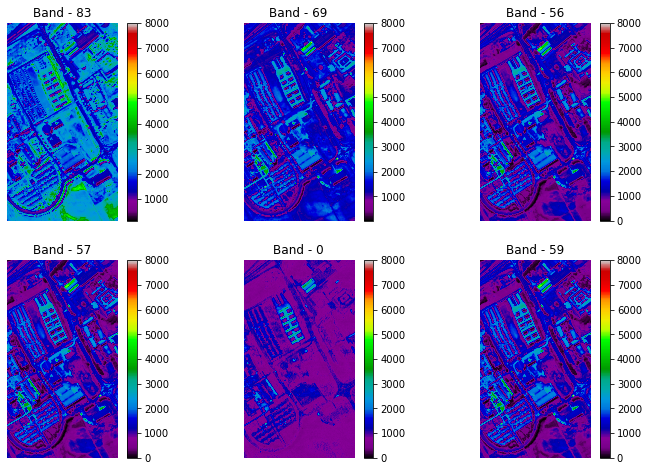

In [ ]:
fig = plt.figure(figsize = (12, 8))
for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(x.shape[2])
    plt.imshow(x[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
    plt.colorbar()

In [ ]:
fig= px.imshow(y, color_continuous_scale='inferno',)
                
fig.update_layout(title = 'Gound Truth', coloraxis_showscale=True)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

In [ ]:
def extract_pixels(x,y):###extracting all the pixels values
  q=x.reshape(-1,x.shape[2])
  df=pd.DataFrame(q)
  df=pd.concat([df,pd.DataFrame(data=y.ravel())],axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+x.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df 

In [ ]:
df = extract_pixels(x,y)

In [ ]:
df

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band65,band66,band67,band68,band69,band70,band71,band72,band73,band74,band75,band76,band77,band78,band79,band80,band81,band82,band83,band84,band85,band86,band87,band88,band89,band90,band91,band92,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
0,647,499,464,371,291,319,365,322,296,305,277,219,219,222,201,162,157,183,204,194,198,216,249,284,294,322,338,342,336,342,362,365,348,341,324,316,293,274,251,244,...,192,227,287,376,493,633,763,913,1149,1442,1759,2102,2425,2689,2895,3058,3196,3252,3195,3297,3542,3550,3537,3545,3514,3477,3468,3433,3408,3420,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,328,326,275,215,197,217,239,258,246,233,241,261,279,300,329,344,341,362,362,367,368,359,345,344,327,302,281,271,270,261,...,152,190,242,301,391,505,633,774,960,1191,1454,1737,2001,2209,2363,2484,2594,2613,2541,2588,2821,2839,2738,2690,2678,2673,2712,2725,2657,2605,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,278,255,232,207,210,209,168,139,137,154,168,202,225,231,244,257,263,262,266,276,285,291,285,272,271,241,208,194,179,157,...,116,153,188,243,322,413,492,591,737,933,1125,1327,1519,1666,1790,1934,2029,2034,2010,2069,2191,2233,2245,2249,2255,2250,2249,2239,2239,2282,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,217,215,187,161,152,136,124,122,127,126,125,123,147,188,208,203,202,206,219,235,238,227,217,215,216,201,190,167,149,162,...,129,174,245,338,455,585,720,850,1013,1225,1460,1702,1938,2157,2317,2433,2525,2552,2493,2554,2733,2781,2748,2748,2737,2710,2681,2642,2645,2684,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,207,154,123,95,106,102,101,123,154,170,191,210,216,256,289,325,348,357,361,362,363,370,386,369,344,331,312,308,288,263,...,173,220,292,382,488,592,692,834,1032,1236,1461,1698,1876,2007,2118,2213,2288,2267,2192,2274,2448,2454,2387,2388,2441,2435,2454,2457,2430,2423,2392,2344,2289,2328,2415,2424,2386,2431,2456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207395,574,594,504,411,468,443,378,342,352,434,437,359,325,322,339,346,352,374,402,405,429,446,459,480,509,520,521,527,555,570,575,579,578,587,599,604,596,580,575,581,...,664,696,748,827,929,1033,1128,1245,1382,1497,1579,1650,1738,1814,1849,1893,1931,2001,2078,2063,1976,2021,2074,2065,2084,2110,2123,2116,2108,2130,2150,2157,2157,2169,2151,2108,2077,2076,2136,0
207396,485,644,709,582,504,494,434,373,391,421,419,439,464,450,431,388,367,387,416,425,415,425,437,462,519,568,582,589,597,632,634,636,650,633,614,613,617,616,611,597,...,635,680,736,812,900,1041,1189,1310,1414,1509,1626,1756,1844,1898,1931,1964,2033,2125,2200,2151,2070,2077,2109,2142,2169,2189,2193,2179,2193,2218,2264,2295,2282,2265,2275,2293,2274,2274,2258,0
207397,593,387,428,461,470,392,331,383,439,355,316,382,370,319,316,348,388,401,373,386,435,469,497,502,529,564,573,600,626,648,669,695,694,671,666,652,629,599,588,584,...,551,603,691,800,924,1076,1218,1360,1514,1661,1778,1880,1989,2106,2177,2220,2269,2329,2349,2292,2231,2263,2297,2292,2317,2359,2408,2419,2398,2384,2393,2407,2433,2413,2373,2389,2382,2407,2423,0
207398,593,751,655,458,503,560,482,412,404,454,472,454,422,400,377,343,358,380,370,393,426,429,457,516,557,599,616,619,633,648,673,678,678,666,651,657,643,605,567,559,...,516,574,652,763,887,1010,1152,1306,1475,1647,1768,1887,1984,2071,2121,2153,2201,22

In [ ]:
df.shape

(207400, 104)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, band1 to class
dtypes: uint16(103), uint8(1)
memory usage: 40.9 MB


In [ ]:
df.iloc[:,:-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band64,band65,band66,band67,band68,band69,band70,band71,band72,band73,band74,band75,band76,band77,band78,band79,band80,band81,band82,band83,band84,band85,band86,band87,band88,band89,band90,band91,band92,band93,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.00000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,838.761900,833.532261,833.957903,840.022734,846.49027,849.024166,858.274605,869.041553,879.729687,893.426895,909.047888,929.773245,950.449826,971.719296,999.330747,1030.487247,1047.342570,1056.144036,1064.008298,1078.164397,1094.337912,1102.542194,1106.111823,1112.674807,1116.410511,1117.368182,1116.463134,1115.816958,1115.709667,1116.513134,...,1151.786355,1167.364634,1196.965762,1242.671355,1300.318158,1374.747102,1451.015511,1524.074653,1596.037252,1671.897768,1753.491707,1835.790125,1922.294619,1996.554687,2063.378761,2114.096861,2155.272912,2194.415844,2216.565135,2212.345323,2193.142758,2210.446374,2232.427758,2245.315858,2245.806716,2246.235497,2253.048669,2267.367917,2265.880313,2257.890217,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,654.150867,663.504620,675.055950,685.877447,694.17722,700.069128,706.904269,710.988908,712.225631,712.766144,711.116605,707.754548,702.056494,696.329369,694.323524,695.658318,691.457118,685.112863,680.143249,679.484331,680.548766,678.991678,678.109958,681.818279,686.403595,691.668118,696.466303,700.002590,701.182840,700.248079,...,736.586216,724.016756,708.647458,695.452171,674.953291,653.314752,632.543791,615.486140,603.333136,597.054264,605.347893,629.388781,667.016967,708.788296,750.020598,785.134096,814.465202,840.078731,856.606082,852.494726,820.735878,830.340437,856.128856,869.604098,871.258687,870.414926,870.642830,872.611679,868.905723,863.646853,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,26.000000,37.000000,41.000000,59.000000,71.000000,72.0000

In [ ]:
def plot_signature(df):###plotting any random pixel value to identify the class present in it
    plt.figure(figsize=(12, 6))
    pixel_no = np.random.randint(df.shape[0])
    plt.plot(range(1, 104), df.iloc[pixel_no, :-1].values.tolist(),'b--',label= f'Class - {df.iloc[pixel_no, -1]}')
    plt.legend()
    plt.title(f'Pixel({pixel_no}) signature', fontsize=14)
    plt.xlabel('Band Number', fontsize=14)
    plt.ylabel('Pixel Intensity', fontsize=14)
    plt.show()

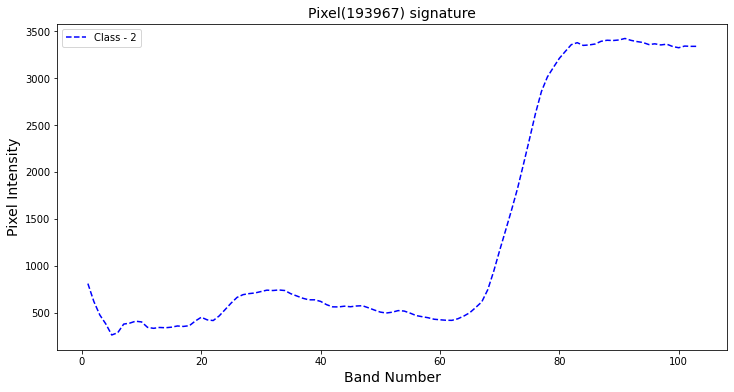

In [ ]:
plot_signature(df)

In [ ]:
print(f"Unique Class Labels: {df.loc[:, 'class'].unique()}")

Unique Class Labels: [0 1 4 2 8 5 9 6 3 7]


In [ ]:
df.loc[:, 'class'].value_counts()

0    164624
2     18649
1      6631
6      5029
8      3682
4      3064
3      2099
5      1345
7      1330
9       947
Name: class, dtype: int64

In [ ]:
class_labels = {'1': 'Asphalt'	,
'2'	:'Meadows'	,
'3'	:'Gravel'	,
'4'	:'Trees'	,
'5'	:'Painted metal sheet'	,
'6'	: 'Bare soil'	,
'7'	:'Bitumen'	,
'8'	:'Self-blocking bricks'	,
'9'	:'Shadows'}

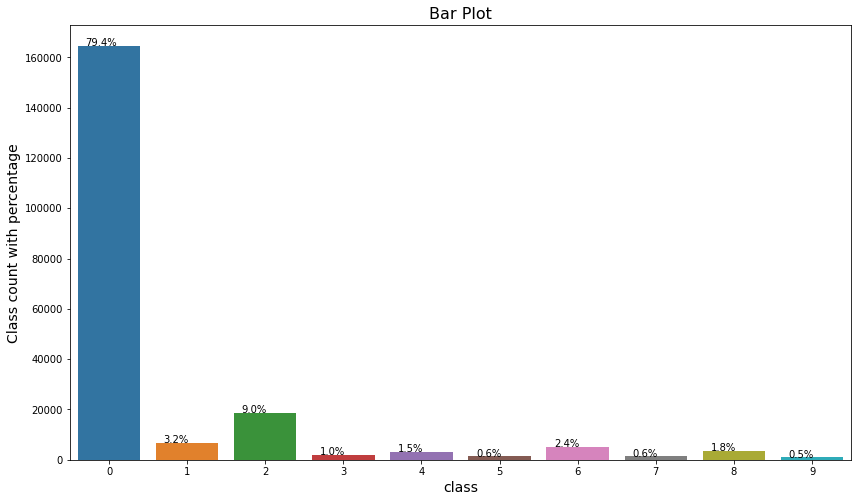

In [ ]:
plt.figure(figsize=(14, 8))

ax = sns.countplot(x='class', data=df[['class']])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/df.shape[0]), (p.get_x()+0.1, p.get_height()+5))
#ax.yaxis.set_major_locator(ticker.LinearLocator(11))

plt.ylabel('Class count with percentage', fontsize=14)

plt.xlabel('class', fontsize=14)

plt.title('Bar Plot', fontsize=16)

plt.show()

In [ ]:
X = df.iloc[:, :-1].values

Y = df.iloc[:, -1].values

In [ ]:
X.shape, Y.shape

((207400, 103), (207400,))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,1+x.shape[2])]+['class']

In [ ]:
q

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17,PC-18,PC-19,PC-20,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26,PC-27,PC-28,PC-29,PC-30,PC-31,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,...,PC-65,PC-66,PC-67,PC-68,PC-69,PC-70,PC-71,PC-72,PC-73,PC-74,PC-75,PC-76,PC-77,PC-78,PC-79,PC-80,PC-81,PC-82,PC-83,PC-84,PC-85,PC-86,PC-87,PC-88,PC-89,PC-90,PC-91,PC-92,PC-93,PC-94,PC-95,PC-96,PC-97,PC-98,PC-99,PC-100,PC-101,PC-102,PC-103,class
0,-5150.190044,6795.052770,1532.351461,410.030134,-259.856157,-832.898970,293.239776,278.385213,-285.609914,251.208844,-283.851988,11.785134,92.316042,-9.572306,-59.484595,-62.759503,67.980055,71.357927,-86.405660,-34.349515,62.894934,-30.454549,30.860506,40.383588,13.302696,34.638724,37.200398,-14.121052,-3.429120,-38.507612,41.376236,-26.377314,-14.606374,31.914230,49.818984,-29.660146,1.292185,6.759405,-17.824200,-12.362695,...,-13.459266,-18.823888,-3.916088,-7.575727,-6.184170,6.007376,-3.327426,-1.638243,-0.724020,-7.631263,3.262630,-8.623426,-10.610916,1.367728,3.269890,4.017759,-7.187519,-4.646532,-4.982510,3.995719,-2.657631,8.542076,1.387807,1.850809,-0.119100,4.896086,-2.102049,4.440745,-5.139963,3.426914,0.296288,1.181724,3.725747,-6.941622,-0.214874,-0.785944,-1.757598,0.613904,0.711679,0
1,-6082.245760,3158.592195,1463.194744,154.617093,-438.871878,-496.202149,362.925839,187.355434,-287.796733,180.614526,-245.032466,-57.699533,75.369243,-18.975392,1.723889,23.982176,69.385956,-6.260221,-0.886562,-59.480916,33.319659,4.709441,25.909615,2.629385,-15.580322,26.377532,-33.613926,-55.994877,-23.444319,18.098315,-77.871824,29.255643,-1.702034,-37.711801,13.990200,6.545086,1.462270,-42.365124,9.417183,-6.572603,...,-0.670295,-19.295652,-4.639363,-19.208832,-3.768846,-5.970665,-1.336046,5.401296,-0.959679,6.777872,3.980899,-1.852102,3.368554,-3.597266,3.032736,-5.961092,-6.479275,-2.096229,8.442527,-4.860724,3.068179,1.418931,-2.349510,-0.348708,3.959329,3.695203,-3.326409,-1.931910,5.930803,-2.579151,-3.325899,-0.992556,-0.003069,-2.702325,-4.231897,-0.346036,1.212476,0.809433,-0.569451,0
2,-7214.505405,1158.875812,1400.817899,410.044063,38.052916,-560.804196,-140.004203,8.847608,-211.057195,14.139042,-260.363170,60.943631,25.527787,39.059950,86.410455,-46.907981,-36.134691,-71.179368,-35.051078,32.168935,-35.633652,-14.518105,22.513580,4.710990,43.000284,7.242763,-1.033056,31.151610,-7.177556,-23.066103,28.762947,16.663825,4.734011,21.256679,-4.633460,15.849070,-18.302345,27.889265,-2.780174,-19.811366,...,14.609006,-0.495446,10.592878,0.215046,2.386711,-11.186750,1.221570,2.227572,2.357309,11.327086,-7.506023,-1.659024,2.438601,3.240586,-4.462999,2.297484,4.022051,-3.109930,-2.408239,-6.324600,0.262751,-2.371137,-4.935353,2.631071,1.733411,-1.154590,-4.303409,4.037922,0.752517,-2.390155,2.043676,3.846506,0.507142,2.387454,0.739171,1.016206,-2.899193,-3.736167,1.226546,0
3,-6566.279360,3398.894763,1126.024772,496.775042,-302.415250,-409.493899,218.391586,-2.957277,-223.380076,188.819722,-125.724730,-204.723885,107.586322,-57.272409,60.090737,-56.531577,6.670793,-62.072831,-44.456344,51.190523,20.062448,-63.649820,17.540412,-4.218856,-53.510343,38.749516,-11.948996,17.931001,-1.566870,-10.596730,45.905988,2.794483,16.826740,17.101214,-25.296073,-0.940901,-3.815115,-36.072400,6.540613,25.323225,...,1.040033,-11.160517,-14.215563,0.234052,-12.081611,1.820097,-11.517120,3.642876,6.077039,3.649333,8.195090,-11.347305,7.425905,-8.239543,-0.666057,10.119430,1.248572,-6.427568,1.680810,6.913766,9.953129,-0.646284,1.847751,1.730014,2.349250,-2.913266,-1.876302,-3.837141,-2.888914,-2.567387,1.477577,4.373741,1.270309,1.414024,-2.149462,-0.387003,2.065415,0.401348,-0.816765,0
4,-6496.967970,2154.797771,1035.954575,27.247705,-194.891403,-189.044607,-71.142484,-97.987804,-126.456170,215.182030,-199.697715,2.975447,11.921119,-2.917320,18.284123,5.660203,32.576918,-109.163391,19.996098,-33.875611,-27.695955,15.096082,-7.189766,14.031412,30.580543,-73.890657,16.88

In [ ]:
pca = PCA(n_components=5, whiten=True)### applying PCA for dimensionality reduction
principalComponents = pca.fit_transform(X)

principalComponents.shape

(207400, 5)

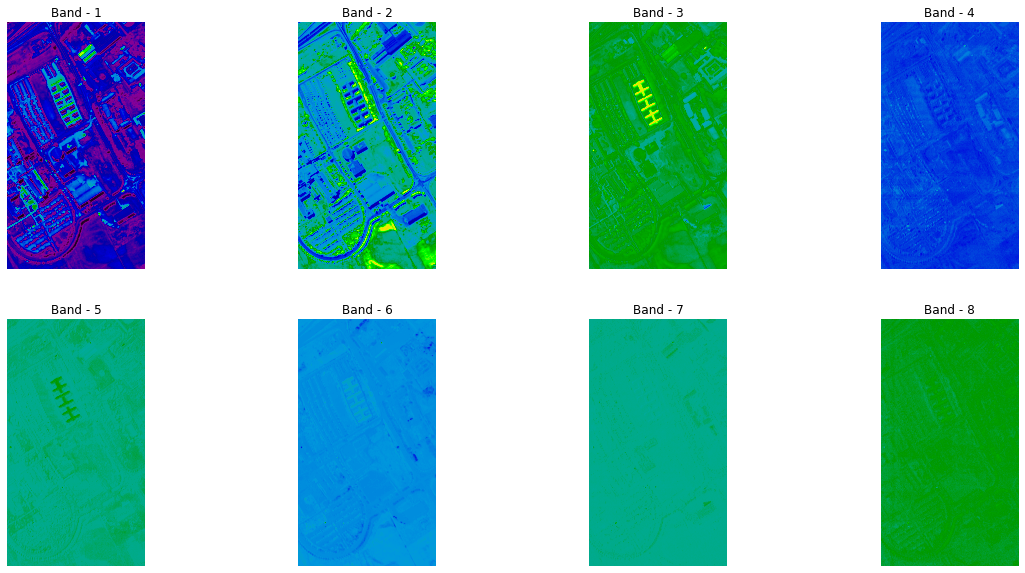

In [ ]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(610,340), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

In [ ]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df.iloc[:, :-1].values)
new = pd.concat([pd.DataFrame(data = principalComponents), pd.DataFrame(data = y.ravel())], axis = 1)
new.columns = [f'PC-{i}' for i in range(1,6)]+['class']

In [ ]:
new

,PC-1,PC-2,PC-3,PC-4,PC-5,class
0,-5150.190044,6795.052770,1532.351461,410.030134,-259.856157,0
1,-6082.245760,3158.592195,1463.194744,154.617093,-438.871878,0
2,-7214.505405,1158.875812,1400.817899,410.044063,38.052916,0
3,-6566.279360,3398.894763,1126.024772,496.775042,-302.415250,0
4,-6496.967970,2154.797771,1035.954575,27.247705,-194.891403,0
...,...,...,...,...,...,...
207395,-4315.315283,208.879103,-37.600057,-15.785801,116.620060,0
207396,-4012.494488,685.248307,199.328731,55.691615,137.768056,0
207397,-3975.035084,1643.062559,253.132178,-287.686124,114.539234,0
207398,-4042.639452,1231.520377,499.960314,-126.281001,-153.053615,0


In [ ]:
ev=pca.explained_variance_ratio_

In [ ]:
ev

array([0.58318064, 0.36100695, 0.04437561, 0.00300841, 0.00209792])

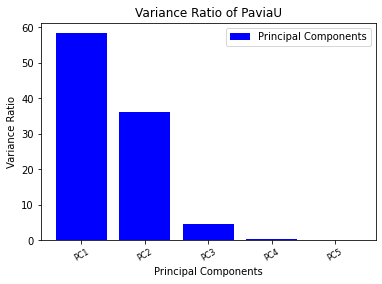

In [ ]:
plt.bar([1,2,3,4,5],list(ev*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components')
pc=[]
for i in range(15):
    pc.append('PC'+str(i+1))
#plt.xticks([1,2,3,4,5],pc, fontsize=8, rotation=30)
plt.xticks([1,2,3,4,5],pc, fontsize=8, rotation=30)
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio of PaviaU')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, Y,  range(X.shape[0]), 
                                                                                  test_size = 0.3, random_state = 11)

In [ ]:
X_train.shape, X_test.shape

((145180, 5), (62220, 5))

In [ ]:
y_train.shape, y_test.shape

((145180,), (62220,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier## using K-NN algo for classification
classifier=KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)*100}%')### Accuracy score

Accuracy: 80.9787849566056%


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)

In [ ]:
cm

array([[45531,   645,  1930,   146,   212,    86,   240,   113,   375,
           88],
       [ 1109,   776,     1,     6,     0,     0,     0,    49,    13,
            0],
       [ 3172,     0,  2384,     0,     9,     0,    26,     0,     0,
            0],
       [  426,     1,     1,   169,     0,     0,     0,     0,    40,
            0],
       [  763,     0,    25,     0,   133,     0,     0,     0,     0,
            0],
       [   46,     0,     0,     0,     0,   371,     0,     0,     0,
            0],
       [ 1133,     0,   112,     0,     0,     0,   249,     0,     0,
            0],
       [  129,    19,     0,     1,     0,     0,     0,   245,     0,
            0],
       [  699,     2,     0,    45,     0,     0,     0,     1,   416,
            0],
       [  172,     0,     0,     0,     0,     0,     0,     0,     0,
          111]])

In [ ]:
pip install -q scikit-plot

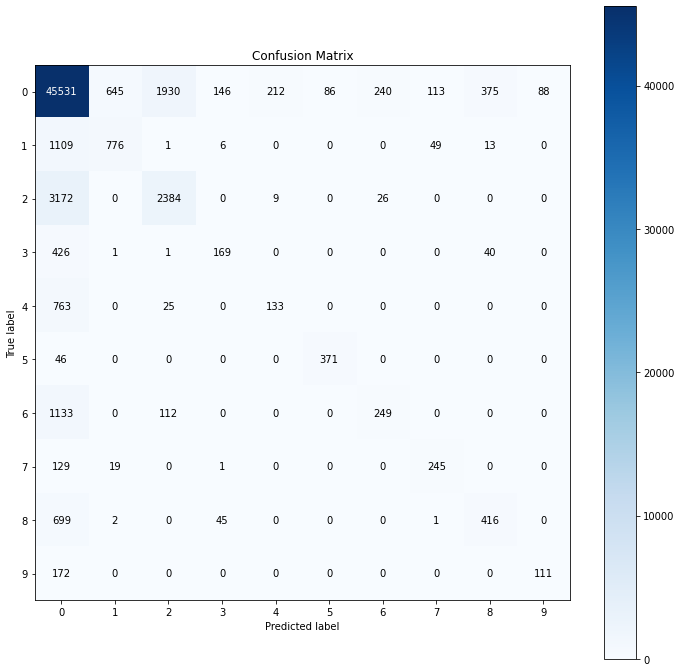

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))## plotting confusion matrix

In [ ]:
print('Classification report:\n',classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     49366
           1       0.54      0.40      0.46      1954
           2       0.54      0.43      0.47      5591
           3       0.46      0.27      0.34       637
           4       0.38      0.14      0.21       921
           5       0.81      0.89      0.85       417
           6       0.48      0.17      0.25      1494
           7       0.60      0.62      0.61       394
           8       0.49      0.36      0.41      1163
           9       0.56      0.39      0.46       283

    accuracy                           0.81     62220
   macro avg       0.57      0.46      0.49     62220
weighted avg       0.79      0.81      0.79     62220



In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier, X =X_train, y =y_train, cv=10)

In [ ]:
accuracies

array([0.80989117, 0.80279653, 0.80376085, 0.80534509, 0.80858245,
       0.80431189, 0.80816917, 0.80734261, 0.80947789, 0.80258989])

In [ ]:
accuracies.mean()*100

80.62267529962804

In [ ]:
from sklearn.model_selection import GridSearchCV### Applying grid search
parameters= [{'n_neighbors':[10,11,12,13,14],'weights':['uniform','distance'],'p':[1,2]}]
grid_search=GridSearchCV(estimator= classifier, 
                         param_grid= parameters, 
                         verbose=1,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)
grid_search=grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.3min finished


In [ ]:
best_accuracy=grid_search.best_score_
best_accuracy

0.8174197547871607

In [ ]:
best_parameters=grid_search.best_params_
best_parameters

{'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier## using K-NN algo for classification
classifier=KNeighborsClassifier(n_neighbors=14, metric= 'minkowski', p=2, weights='uniform')
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [ ]:
y__pred = classifier.predict(X_test)

In [ ]:
y__pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(f'Accuracy: {accuracy_score(y_test, y__pred)*100}%')### Accuracy score

Accuracy: 81.90131790421087%


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y__pred)
ac=accuracy_score(y_test,y__pred)

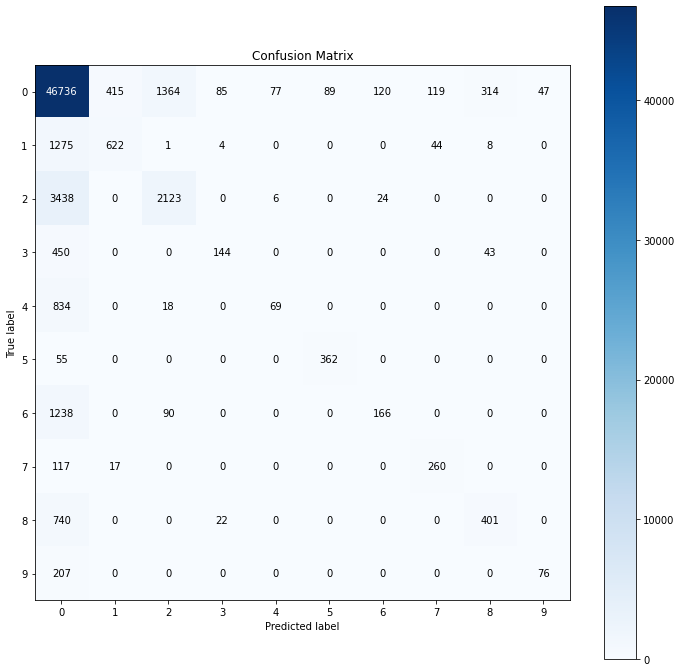

In [ ]:
import scikitplot as skplt
 
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y__pred,
    figsize=(12,12))## plotting confusion matrix

In [ ]:
print('Classification report:\n',classification_report(y_test,y__pred))

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89     49366
           1       0.59      0.32      0.41      1954
           2       0.59      0.38      0.46      5591
           3       0.56      0.23      0.32       637
           4       0.45      0.07      0.13       921
           5       0.80      0.87      0.83       417
           6       0.54      0.11      0.18      1494
           7       0.61      0.66      0.64       394
           8       0.52      0.34      0.42      1163
           9       0.62      0.27      0.37       283

    accuracy                           0.82     62220
   macro avg       0.61      0.42      0.47     62220
weighted avg       0.79      0.82      0.79     62220



In [ ]:
from sklearn.svm import SVC### apply svm

In [ ]:
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(X_train,y_train)

In [ ]:
y_pred_svm = classifier.predict(X_test)

In [ ]:
y__pred_svm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y__pred)*100}%')

In [ ]:
from sklearn.model_selection import GridSearchCV### Applying grid search
parameters= [{'C':[0.1,1,10,100],'loss':['hinge','squared_hinge'],'kernel':['linear', 'poly','rbf','sigmoid'],'gamma':['scale','auto']}]
grid_search=GridSearchCV(estimator= classifier, 
                         param_grid= parameters, 
                         verbose=1,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)
grid_search=grid_search.fit(X_train,y_train)

In [ ]:
from sklearn.svm import SVC## using SVM algo for classification
classifier_svm=SVC(c=10,loss='squared_hinge',kernel='rbf',gamma='auto',random_state=0)
classifier.fit(X_train,y_train)

In [ ]:
y__pred__svm = classifier.predict(X_test)

In [ ]:
y__pred__svm

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y__pred)*100}%')

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y__pred__svm,
    figsize=(12,12))## plotting confusion matrix